In [14]:
import random
from antsystem import AntColonySystem
import matplotlib.pyplot as plt; plt.close('all')
import networkx as nx
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from functools import partial

In [15]:
n = 5
c = [(n*random.random(), n*random.random()) for i in range(n)]
a = AntColonySystem(n, c)
solution = a.findSolution()

graph = []
for i in range(len(a.cityLocations)):
    for j in range(i+1, len(a.cityLocations)):
        graph.append((i, j, {'p':round(a.distance(i, j), 3)}))
graph

Melhor percurso encontrado:  [0, 1, 3, 2, 4, 0]
Tem um tamanho de:  11.195651743320195
Encontrado em  0.35247787605112535  segundos


[(0, 1, {'p': 3.449}),
 (0, 2, {'p': 4.415}),
 (0, 3, {'p': 4.529}),
 (0, 4, {'p': 3.444}),
 (1, 2, {'p': 2.207}),
 (1, 3, {'p': 1.351}),
 (1, 4, {'p': 2.789}),
 (2, 3, {'p': 1.378}),
 (2, 4, {'p': 1.574}),
 (3, 4, {'p': 2.668})]

In [16]:
G = nx.Graph()
G.add_edges_from(graph)

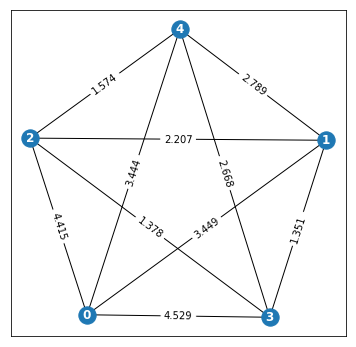

In [17]:
node_colors = ['r', 'g', 'b', 'y']
fig, ax = plt.subplots(figsize=(6,6))
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos)

labels = dict(map(lambda e: [(e[0], e[1]), e[2]['p']], graph))
node_labels = nx.draw_networkx_labels(G, pos, font_color='w', font_weight='bold')
edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [18]:
best_tour = a.bestTourList()
colors = []
for i in best_tour:
    arr = np.zeros(n, dtype=int)
    arr[i] = 29
    colors.append(arr)
colors = np.array(colors)

In [19]:
def update(i):
    global custo
    if i==0:
        custo=0.0
    print("-"*10+"iteração: ",end='')
    print(i,end='-'*10+'\n\n')
    print(">"*10+"custo no começo: ",end='')
    print(custo,end='<'*10+'\n')
    if i<len(colors)-1:
        print("De Cidade %d para Cidade %d"%(best_tour[i],best_tour[i+1]))
        distancia_euclidiana = round(a.distance(best_tour[i],best_tour[i+1]),3)
        novo_custo = custo + distancia_euclidiana
        print("Calculando custo...",end='\n\n')
        print("%f = %f + %f"%(novo_custo, custo, distancia_euclidiana),end='\n\n\n')
        custo = novo_custo
    else:
        print("Fim do Percurso!")
    ax.set_title("Custo: "+str(custo))
    nodes.set_array(colors[i])
    return nodes,

In [20]:
custo = 0.0
anim = FuncAnimation(fig, update ,interval=2000, frames=len(colors), blit=True)



----------iteração: 0----------

>>>>>>>>>>custo no começo: 0.0<<<<<<<<<<
De Cidade 0 para Cidade 1
Calculando custo...

3.449000 = 0.000000 + 3.449000




In [21]:
HTML(anim.to_html5_video())


----------iteração: 0----------

>>>>>>>>>>custo no começo: 0.0<<<<<<<<<<
De Cidade 0 para Cidade 1
Calculando custo...

3.449000 = 0.000000 + 3.449000


----------iteração: 0----------

>>>>>>>>>>custo no começo: 0.0<<<<<<<<<<
De Cidade 0 para Cidade 1
Calculando custo...

3.449000 = 0.000000 + 3.449000


----------iteração: 1----------

>>>>>>>>>>custo no começo: 3.449<<<<<<<<<<
De Cidade 1 para Cidade 3
Calculando custo...

4.800000 = 3.449000 + 1.351000


----------iteração: 2----------

>>>>>>>>>>custo no começo: 4.8<<<<<<<<<<
De Cidade 3 para Cidade 2
Calculando custo...

6.178000 = 4.800000 + 1.378000


----------iteração: 3----------

>>>>>>>>>>custo no começo: 6.178<<<<<<<<<<
De Cidade 2 para Cidade 4
Calculando custo...

7.752000 = 6.178000 + 1.574000


----------iteração: 4----------

>>>>>>>>>>custo no começo: 7.752<<<<<<<<<<
De Cidade 4 para Cidade 0
Calculando custo...

11.196000 = 7.752000 + 3.444000


----------iteração: 5----------

>>>>>>>>>>custo no começo: 11.196<<<

In [22]:
print("Melhor Caminho: ", end='')
for i in range(0, len(best_tour)):
    print(best_tour[i], end = ' => ' if i<len(best_tour)-1 else '\n')

Melhor Caminho: 0 => 1 => 3 => 2 => 4 => 0
